In [7]:

from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
import pandas as pd
import anndata
from matplotlib import pyplot as plt

import seaborn as sns

import scanpy as sc

import os

<h4>Import scATAC<h4>

In [43]:
genes_df = pd.read_csv("./data/atac_data/genes_atac.tsv", sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')
barcodes_df = pd.read_csv("./data/atac_data/barcodes_atac.tsv", sep='\t')

In [45]:
atac_df.head(100)
atac_df = atac_df.iloc[:, 1:]
atac_df
#atac_df.transpose().describe()
#df.head(10)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,...,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761
996,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,...,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364
997,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,...,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490
998,-0.048972,-0.048972,-0.048972,-0.048972,7.911695,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,...,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972


<h1>UMAP and PCA</h1>
https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot
import umap


In [47]:
pca = PCA(n_components=2)
comps = pca.fit_transform(atac_df)
print(pca.explained_variance_ratio_)


[0.01466142 0.00569292]


In [49]:
comps.shape

(1000, 2)

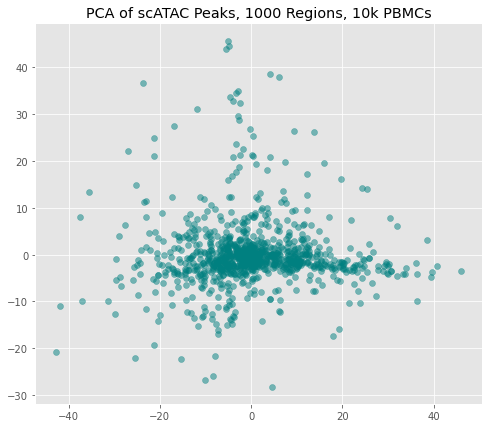

In [67]:
fig, ax = plt.subplots(figsize=(8,7))
plt.scatter(comps[:,0], comps[:,1], alpha=0.5, c='teal')
plt.title("PCA of scATAC Peaks, 1000 Regions, 10k PBMCs")
plt.style.use('ggplot')

<h1>Predict B Cell Pathway Scores from scATACseq data</h1>

<h4>Use pseudobulk scRNAseq?</h4>
#https://www.youtube.com/watch?v=797iq6m64w0

In [15]:

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing


In [16]:
sing = pd.read_csv('./data/sing_scores.tsv', sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')

atac_df
atac = atac_df.iloc[:, 1:]
atac.head(10)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
5,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,...,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783
6,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,...,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002
7,1.866472,1.166208,-0.709761,-0.709761,0.266226,0.909591,0.808395,-0.709761,0.998236,-0.709761,...,1.675700,-0.709761,-0.709761,-0.709761,-0.709761,1.282474,-0.709761,-0.709761,-0.709761,-0.709761
8,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,...,-0.214832,-0.214832,-0.214832,-0.214832,8.229245,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832
9,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,...,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019


<h4 style="color:#ff9966"> Drop Regions with Low Variance</h4>


In [17]:
#Remove regions where std=0
reg = atac.transpose()
reg.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,...,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000
mean,-0.003070,-0.002151,-0.000922,0.001699,0.000159,-0.001223,0.000899,0.001591,0.000225,-0.003773,...,0.001980,-0.003774,0.000163,0.000956,-0.000253,0.001958,-0.001886,-0.001241,-0.000975,-0.000101
std,0.986899,0.993915,0.980539,1.010422,1.004439,0.994993,1.004294,1.003440,1.005550,0.987845,...,1.013093,0.982666,1.002482,1.005245,1.000466,1.003827,0.995827,0.998245,0.987921,1.004276
min,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
25%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
50%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
75%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.852079,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,0.854393,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
max,31.981493,17.436842,33.499830,22.318361,23.783980,18.751770,18.337399,4.711770,10.931227,8.693009,...,26.242147,17.348585,19.695711,18.356981,4.761416,8.334252,15.122928,37.153200,47.842680,14.643348


In [36]:
reg.max()

0      31.981493
1      17.436842
2      33.499830
3      22.318361
4      23.783980
         ...    
995     8.334252
996    15.122928
997    37.153200
998    47.842680
999    14.643348
Length: 1000, dtype: float64

In [18]:
reg.loc[:, reg.std() > 0.9]


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
AAACAGCCAATCCCTT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.866472,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAATGCGCT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.166208,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCACCAACCG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAGGATAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAGTAGGTG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.266226,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,1.644300,-0.346761,-0.171364,-0.06649,7.911695,-0.175789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.282474,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTGTTAAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTTAGGATT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTTGGTTAG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789


In [19]:
#Select a subsample of cells/barcodes to set as X (the predictor)
features = 1000
atac2 = atac.transpose()
atac3 = atac2.iloc[:, 0:features].transpose()
#features = [0,100]
#atac2.transpose()[100]
#['AAACAGCCAATCCCTT-1','AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1', 'AAACAGCCAGGATAAC-1']
atac3

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,...,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761,-0.346761
996,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,...,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364,-0.171364
997,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,...,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490,-0.066490
998,-0.048972,-0.048972,-0.048972,-0.048972,7.911695,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,...,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972,-0.048972


array([[<AxesSubplot:title={'center':'Bcell_score'}>]], dtype=object)

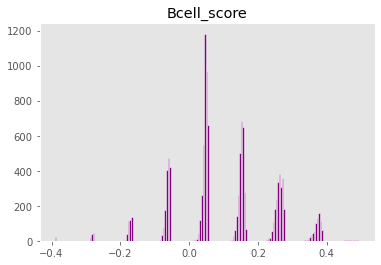

In [90]:
sing
sing2 = sing.set_index('cell_ids')
sing3 = sing2.iloc[:, 0:features].transpose()
#sing3 = sing2.loc[100]
sing3.transpose().hist(color='purple', edgecolor="white", grid=False, bins=200)

In [21]:

atac4 = atac3
#Rename columns to cell_ids
atac4 = atac4.rename_axis('cells_ids',axis='columns')

#Remove Bcell_Score label
sing4 = sing3.rename(columns={'Bcell_score':''})

#Append sing scores to last row

atac5 = atac4.append(sing4)

#Remove Bcell_score indexing
atac6 =atac5.dropna(axis=1).reset_index()
atac_df = atac6.iloc[:, 1:]
atac_df = atac_df.transpose()
atac_df



/tmp/ipykernel_5085/3764745959.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atac5 = atac4.append(sing4)


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
AAACAGCCAATCCCTT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.866472,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.071999
AAACAGCCAATGCGCT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.166208,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.042124
AAACAGCCACCAACCG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.153889
AAACAGCCAGGATAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.167156
AAACAGCCAGTAGGTG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.266226,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,1.644300,-0.346761,-0.171364,-0.06649,7.911695,-0.175789,0.139602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.282474,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.047503
TTTGTTGGTGTTAAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.253775
TTTGTTGGTTAGGATT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.053615
TTTGTTGGTTGGTTAG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.047144


In [22]:
atac_ml = atac_df
X = atac_ml.iloc[:, 0:999]
Y = atac_ml.loc[:, 1000]
X
Y


AAACAGCCAATCCCTT-1   -0.071999
AAACAGCCAATGCGCT-1    0.042124
AAACAGCCACCAACCG-1    0.153889
AAACAGCCAGGATAAC-1   -0.167156
AAACAGCCAGTAGGTG-1    0.139602
                        ...   
TTTGTTGGTGACATGC-1    0.047503
TTTGTTGGTGTTAAAC-1    0.253775
TTTGTTGGTTAGGATT-1    0.053615
TTTGTTGGTTGGTTAG-1    0.047144
TTTGTTGGTTTGCAGA-1    0.155944
Name: 1000, Length: 9626, dtype: float64

In [23]:

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state = 1)
#print(X_train.shape); print(X_test.shape)

l = pd.DataFrame(data=Y_train)
l

,0
0,0.262621
1,0.150675
2,0.048465
3,0.160963
4,0.132844
...,...
6733,0.051738
6734,0.051489
6735,0.160731
6736,0.151101


In [24]:
# Scale Input Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [25]:
#Run Multi Layer Perceptron Regressor
nn = MLPRegressor(max_iter=40000, activation='logistic', solver='sgd', hidden_layer_sizes = [4], learning_rate='constant',alpha=1).fit(X_train_norm, Y_train) #hidden_layer_sizes= (8,8,8))
Y_pred = nn.predict(X_test_norm)


In [26]:
scaler = preprocessing.StandardScaler().fit(X_train)


print('Accuracy of NN classifier on training set (R2 score): {:.2f}'.format(nn.score(X_train_norm, Y_train)))
print('Accuracy of NN classifier on test set (R2 score): {:.2f}'.format(nn.score(X_test_norm, Y_test)))
#print("Mean Squared Error: ", mean_squared_error(Y_test, Y_train))



Accuracy of NN classifier on training set (R2 score): -0.01
Accuracy of NN classifier on test set (R2 score): -0.00


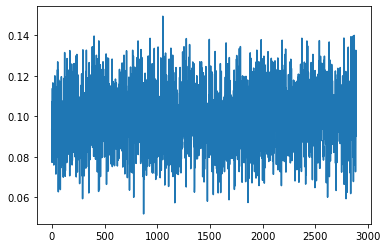

In [35]:
plt.plot(Y_pred)
#plt.plot(Y_test)

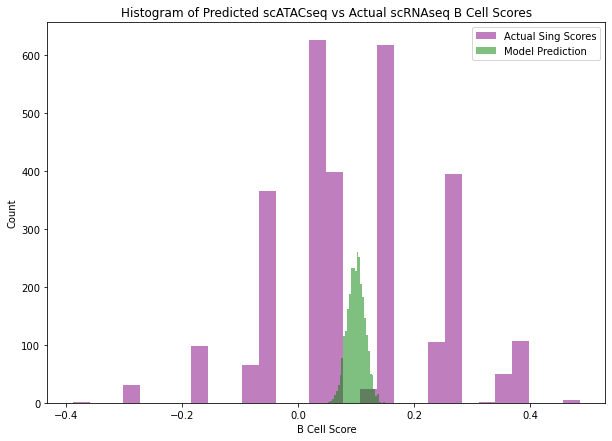

In [29]:
plt.figure(figsize=(10,7))
#plt.hist(sing3.transpose(), alpha=0.2, bins=50, color='green')
plt.hist(Y_test, color='purple',alpha=.5, label='Actual Sing Scores', bins=30)
plt.hist(Y_pred, color='green',alpha=.5, label='Model Prediction', bins=30)
plt.ylabel('Count')
plt.xlabel('B Cell Score')
plt.title('Histogram of Predicted scATACseq vs Actual scRNAseq B Cell Scores')
plt.legend(loc='upper right')
plt.show()

Region   -0.075744
1        -0.116420
2        -0.062548
3        -0.092238
4        -0.076971
            ...   
996      -0.171364
997      -0.066490
998      -0.048972
999      -0.175789
1000     -0.071999
Name: AAACAGCCAATCCCTT-1, Length: 1001, dtype: float64

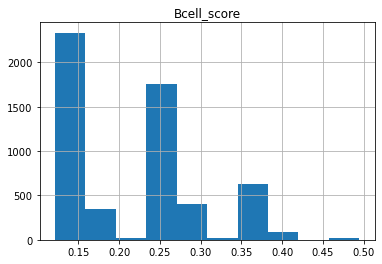

In [30]:
#sing4.transpose()['Bcell_score' > 0]
sing = pd.read_csv('./data/sing_scores.tsv', sep='\t')
sing[sing['Bcell_score'] > 0.1].hist()

atac_df = atac_df.rename(columns={0: 'Region'})
atac_df.iloc[0]
#sing3.transpose().loc[sing3['Bcell_score'] < 0]
#sing3[0:100].plot(x='Bcell_score', kind='bar', stacked=True)
#plt.bar(X_test, Y_pred)
#plt.bar(X_test, Y_test)

 
#plt.style.use('ggplot')
#plt.show()

In [80]:
bcells = pd.read_csv("./data/matrix_rna_bcells.tsv", sep='\t')

In [84]:
#bcells.T.drop()
bcells.T[0]
bcells

,Unnamed: 0,AL627309.1,AL627309.5,AL627309.4,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,...,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC007325.1,AC007325.4
0,AAAGCAAGTTAACGGC-1,-0.081624,-0.20983,-0.064979,-0.03045,3.792935,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,-0.429821,-0.149958,-0.172993,-0.020402,-0.06618
1,AAAGCACCAGCCTTGG-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,1.795872,-0.149958,-0.172993,-0.020402,-0.06618
2,AAAGCCCGTCACAGAC-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,1.459517,-0.149958,-0.172993,-0.020402,-0.06618
3,AAAGCGGGTCATCCTG-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,2.630728,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,-0.429821,-0.149958,-0.172993,-0.020402,-0.06618
4,AAAGGAGCACAGAAAC-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,1.790365,-0.149958,-0.172993,-0.020402,-0.06618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,TTTCTCACAGGTTTGC-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,1.507387,-0.149958,-0.172993,-0.020402,-0.06618
573,TTTGCATTCTACTAAG-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,4.057133,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,-0.429821,-0.149958,-0.172993,-0.020402,-0.06618
574,TTTGGTAAGTCATGCG-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,-0.429821,-0.149958,-0.172993,-0.020402,-0.06618
575,TTTGTCTAGACAACAG-1,-0.081624,-0.20983,-0.064979,-0.03045,-0.227986,-0.039389,-0.220968,-0.116159,-0.076889,...,-0.02047,-0.030334,-0.076302,-0.034752,-0.046489,-0.429821,-0.149958,-0.172993,-0.020402,-0.06618
